<a href="https://colab.research.google.com/github/scro0016/ADS2002/blob/main/Latest_sam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import libraries 
import sklearn.preprocessing
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
from datetime import datetime
from numpy import distutils
import distutils
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [3]:
mean_imputer = SimpleImputer(strategy="mean")
constant_imputer = SimpleImputer(strategy="constant", fill_value=350)

In [24]:
# Alternative and easier way
df = pd.read_csv('gdrive/My Drive/ADS2002 - Solar Farm/raw.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.rename(columns={"start_timestamp": "Timestamp", "series_value": "Value", "series_name": "Name"})
df = df.drop([772830, 772831, 772832])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df= df.set_index('Timestamp')
df1 = df

,Name,Value
Timestamp,,
2020-05-22 15:30:00,Building3,218.0
2020-02-22 20:15:00,Building3,368.0
2019-02-04 23:30:00,Building0,NaN
2018-06-06 01:15:00,Building0,NaN
2017-01-13 12:30:00,Building0,268.5


In [5]:
weather = pd.read_csv('gdrive/My Drive/ADS2002 - Solar Farm/Weather.csv')
weather = weather.dropna()
weather['Timestamp'] = pd.to_datetime(weather['Date'])
weather= weather.set_index('Timestamp')
weather = weather.drop(['Date'], axis=1)
weather = weather.resample('15T').asfreq()
weather = weather.interpolate(method='spline', order=3)
weather.loc[weather['Oly_Rain'] < 0, 'Oly_Rain'] = 0
weather.loc[weather['Oak_Rain'] < 0, 'Oak_Rain'] = 0
weather.loc[weather['Mor_Rain'] < 0, 'Mor_Rain'] = 0
weather2 = weather.copy(deep=True)
weather

,Oly_Max,Mor_Max,Oly_Min,Mor_Min,Oly_Rain,Oak_Rain,Mor_Rain,Oly_Solar,Oak_Solar,Mor_Solar
Timestamp,,,,,,,,,,
2016-01-01 00:00:00,24.200000,25.700000,19.800000,19.300000,0.000000,0.000000,0.000000,22.000000,21.700000,24.300000
2016-01-01 00:15:00,23.989610,25.454710,19.541758,19.085216,0.000000,0.000000,0.000000,22.522275,22.168633,24.295442
2016-01-01 00:30:00,23.854376,25.236264,19.304632,18.901882,0.000000,0.000000,0.000000,22.645777,22.298352,24.405140
2016-01-01 00:45:00,23.723043,25.023539,19.072087,18.721604,0.000000,0.000000,0.000000,22.767729,22.426417,24.513252
2016-01-01 01:00:00,23.595580,24.816489,18.844087,18.544361,0.000000,0.000000,0.000000,22.888138,22.552834,24.619785
...,...,...,...,...,...,...,...,...,...,...
2021-12-06 23:00:00,15.917197,17.102198,6.299510,6.798487,1.505972,2.226636,1.330158,8.326484,8.284223,8.103773
2021-12-06 23:15:00,15.954666,17.216458,6.315762,6.821165,1.149038,1.743871,1.013846,8.356149,8.356167,8.127246
2021-12-06 23:30:00,15.993555,17.333319,6.332343,6.844214,0.784206,1.250204,0.690619,8.386243,8.429727,8.151117


In [8]:
df.isnull().sum()

Name         0
Value    97961
dtype: int64

In [9]:
df_Building0 = df1.loc[df1['Name'] == 'Building0']

df_Building1 = df1.loc[df1['Name'] == 'Building1']
df_Building3 = df1.loc[df1['Name'] == 'Building3']
df_Building4 = df1.loc[df1['Name'] == 'Building4']
df_Building5 = df1.loc[df1['Name'] == 'Building5']
df_Building6 = df1.loc[df1['Name'] == 'Building6']
df_Solar0 = df1.loc[df1['Name'] == 'Solar0']
df_Solar1 = df1.loc[df1['Name'] == 'Solar1']
df_Solar2 = df1.loc[df1['Name'] == 'Solar2']
df_Solar3 = df1.loc[df1['Name'] == 'Solar3']
df_Solar4 = df1.loc[df1['Name'] == 'Solar4']
df_Solar5 = df1.loc[df1['Name'] == 'Solar5']

In [10]:
df_Building0 = df_Building0.join(weather2)
df_Building1 = df_Building1.join(weather2)
df_Building3 = df_Building3.join(weather2)
df_Building4 = df_Building4.join(weather2)
df_Building5 = df_Building5.join(weather2)
df_Building6 = df_Building6.join(weather2)
df_Solar0 = df_Solar0.join(weather2)
df_Solar1 = df_Solar1.join(weather2)
df_Solar2 = df_Solar2.join(weather2)
df_Solar3 = df_Solar3.join(weather2)
df_Solar4 = df_Solar4.join(weather2)
df_Solar5 = df_Solar5.join(weather2)

In [11]:
df_Building5 = df_Building5.apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))
df_Building4 = df_Building4.apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))
df_Building0 = df_Building0.apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))
df_Building6 = df_Building6.apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))
df_Building3 = df_Building3.apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))
df_Building1 = df_Building1.apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))

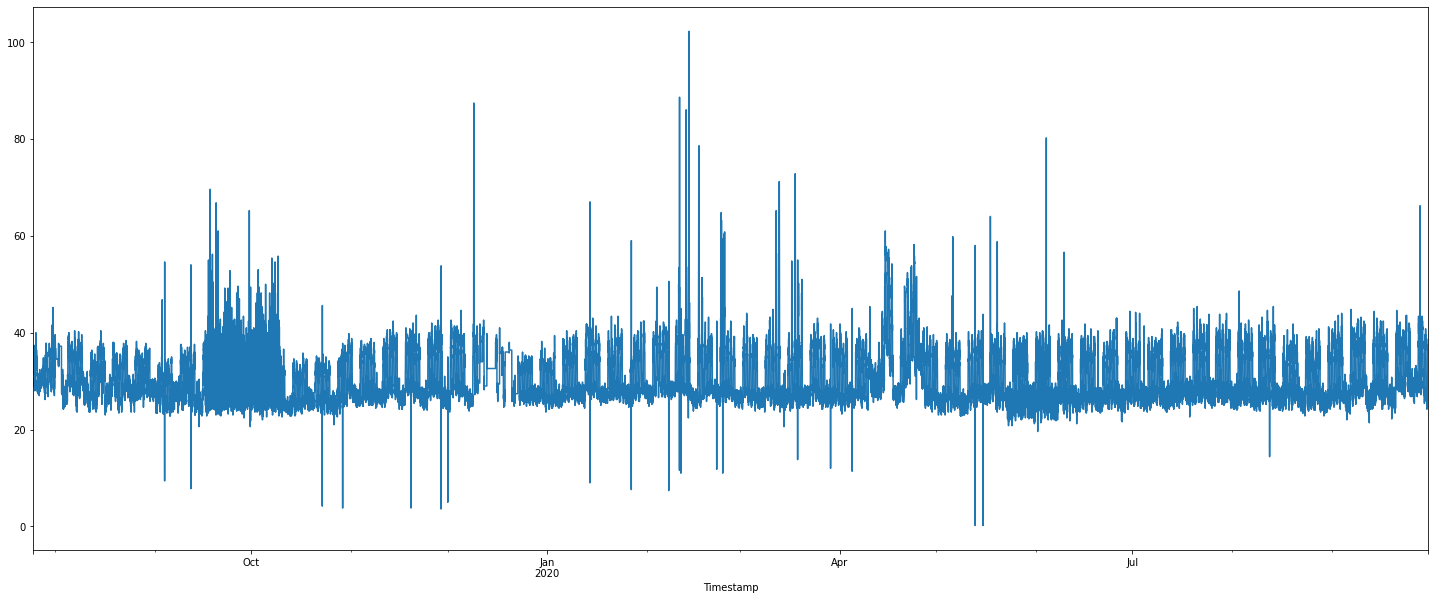

In [31]:
df_Building6['Value'].plot(figsize=(25,10))

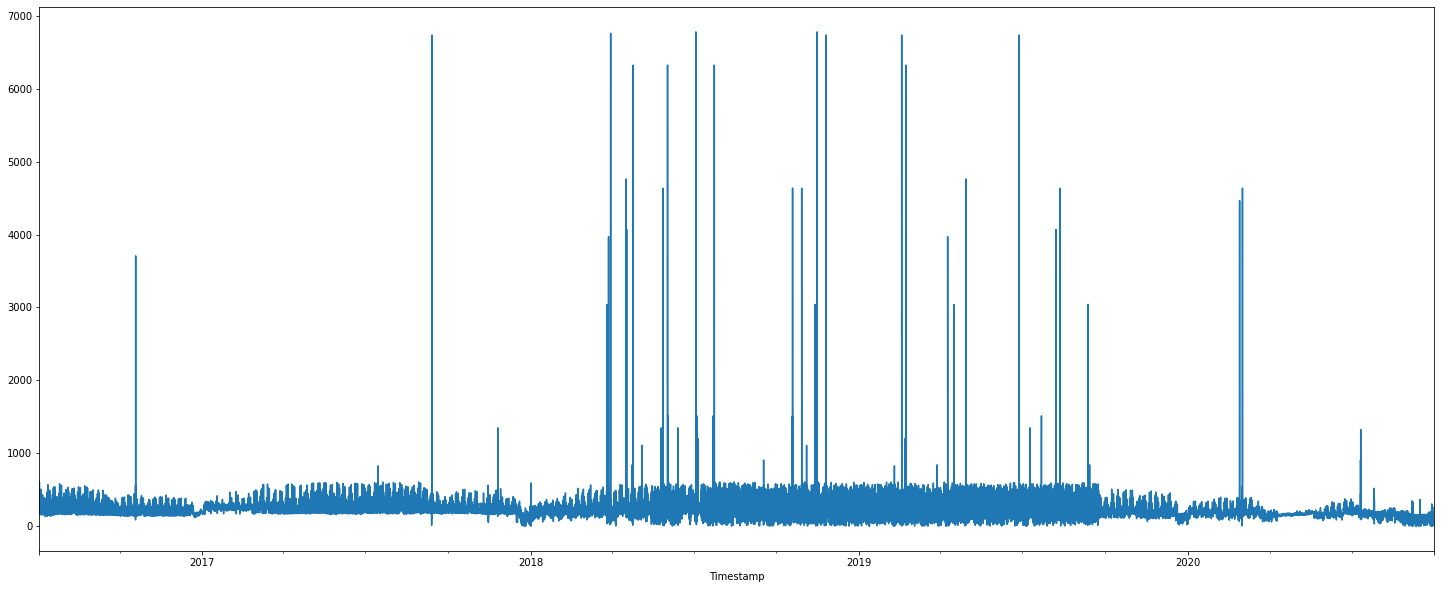

In [15]:
df_Building0['Value'].plot(figsize=(25,10))

In [16]:
corr_solar5 = df_Solar5.corr()
corr_solar3 = df_Solar3.corr()
corr_solar1 = df_Solar1.corr()
corr_solar0 = df_Solar0.corr()
corr_solar2 = df_Solar2.corr()
corr_solar4 = df_Solar4.corr()

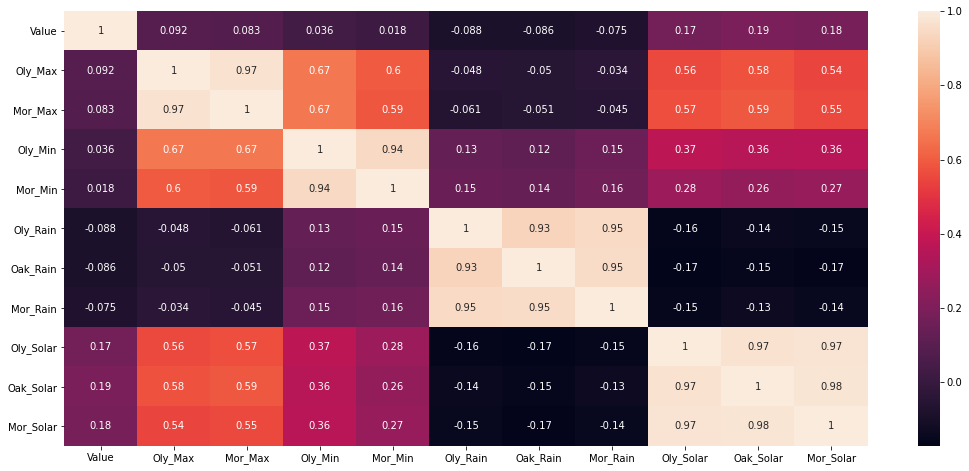

In [17]:
sns.heatmap(corr_solar0, annot=True,)
plt.show()

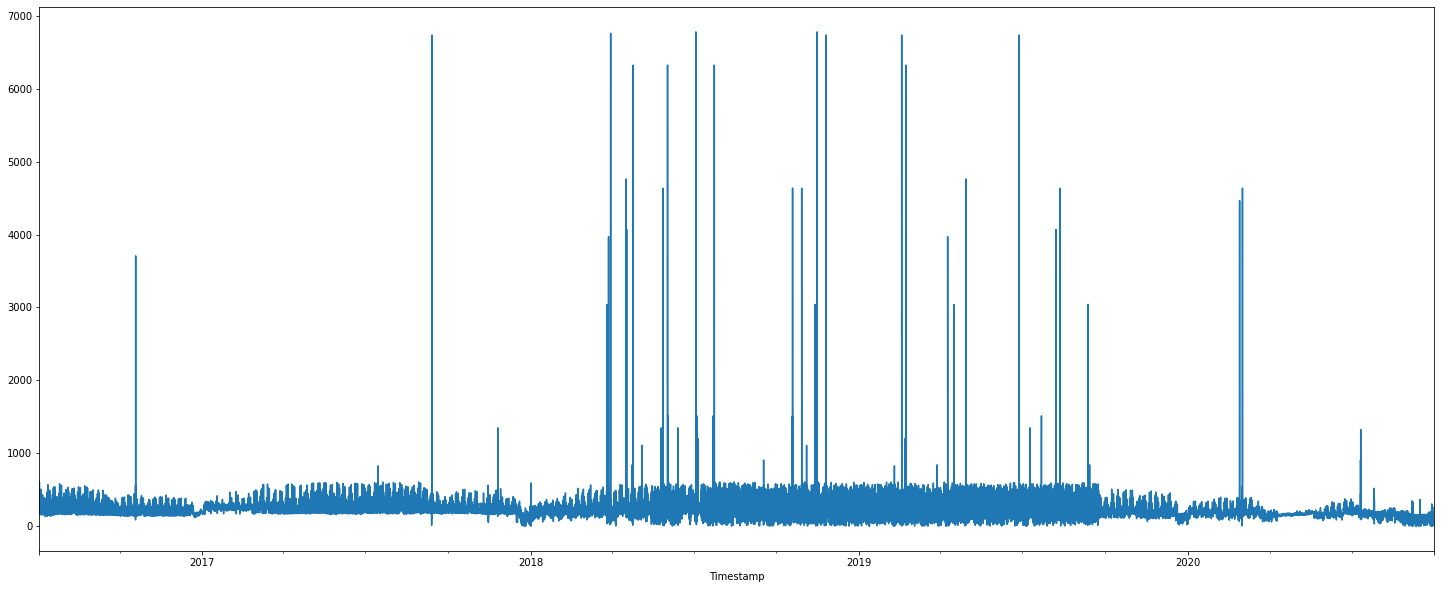

In [18]:
df_Building0['Value'].plot(figsize=(25,10))

**Forecasting Building Power Usage**

In [91]:
df_Building0_condensed = df_Building0.loc['2019-09-24 00:15:00':]
#df_Building0_condensed['Value'].plot(figsize=(25,10))
df_Building0_condensed['ds'] = df_Building0_condensed.index
df_Building0_condensed=df_Building0_condensed.rename(columns={"Value": "y"})
# define the model
model = Prophet()
# fit the model
eg = model.fit(df_Building0_condensed)
df_Building0_condensed

SystemError: ignored

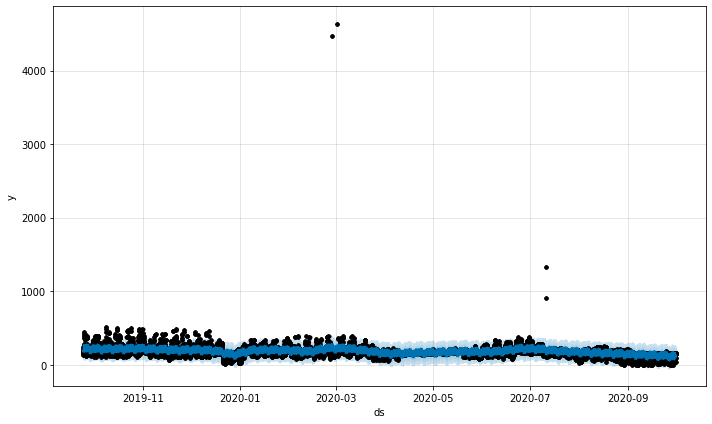

In [ ]:
future = eg.make_future_dataframe(periods=1, freq='15T')
fcst = eg.predict(future)
fig = eg.plot(fcst)

In [ ]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.models import ARIMA
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller, Mapper, InvertibleMapper
from darts.dataprocessing import Pipeline
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.utils.timeseries_generation import linear_timeseries
from darts.datasets import MonthlyMilkDataset, MonthlyMilkIncompleteDataset

<AxesSubplot:xlabel='Timestamp'>

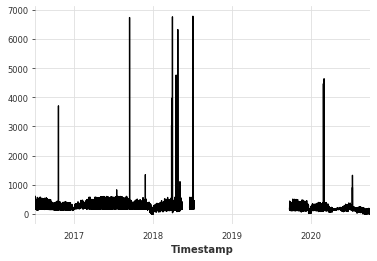

In [ ]:
df_Building0['Value'].plot()

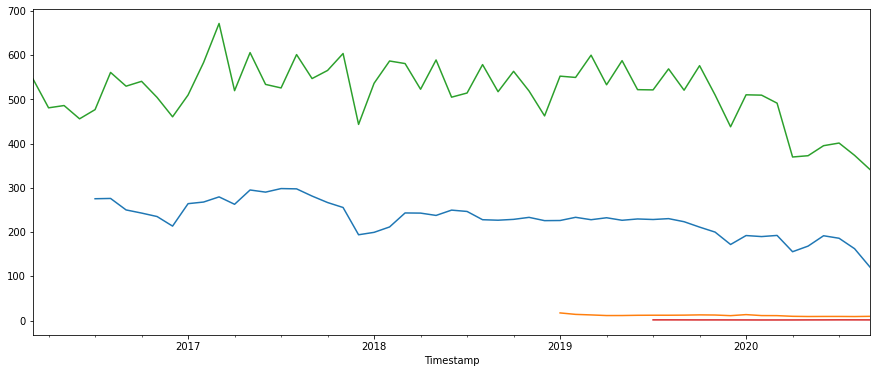

In [38]:
y0 = df_Building0['Value'].resample('MS').mean()
y1 = df_Building1['Value'].resample('MS').mean()
y3 = df_Building3['Value'].resample('MS').mean()
y4 = df_Building4['Value'].resample('MS').mean()
y0.plot(figsize=(15, 6))
y1.plot(figsize=(15, 6))
y3.plot(figsize=(15, 6))
y4.plot(figsize=(15, 6))
plt.show()

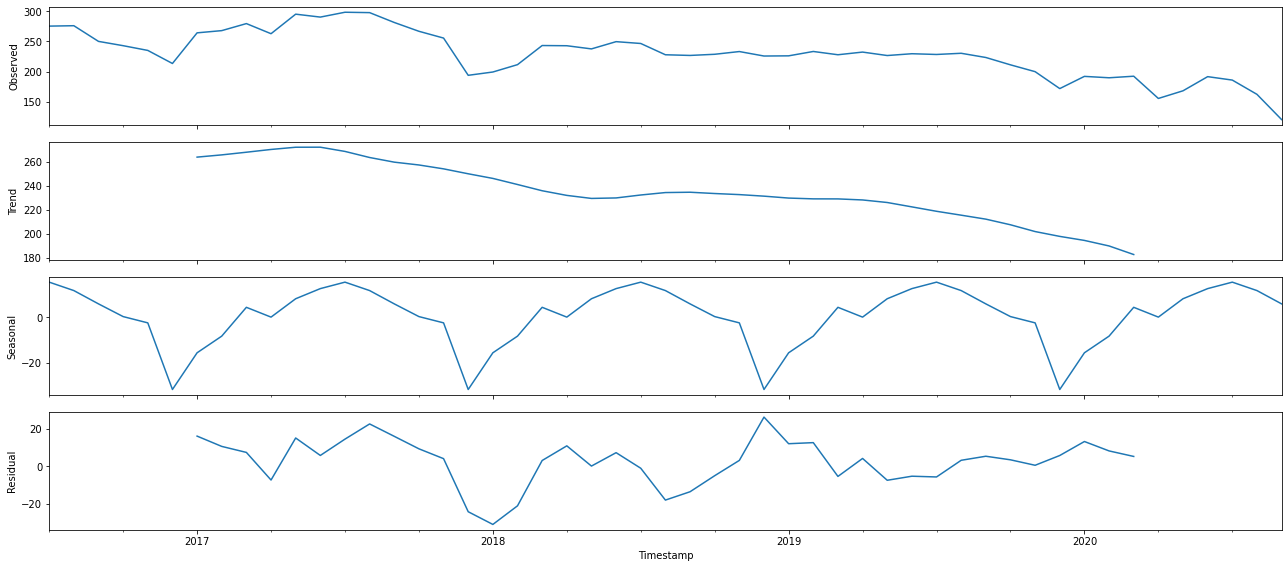

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

fig = decomposition.plot()


In [92]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_Building0_condensed ['y'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -17.307517
p-value: 0.000000


In [94]:
from statsmodels.tsa.arima_model import ARIMA


model = ARIMA(df_Building0_condensed ['y'], order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency 15T will be used.



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                35807
Model:                     ARMA(1, 1)   Log Likelihood             -189422.671
Method:                       css-mle   S.D. of innovations             47.997
Date:                Tue, 07 Sep 2021   AIC                         378853.342
Time:                        03:36:37   BIC                         378887.286
Sample:                    09-24-2019   HQIC                        378864.142
                         - 09-30-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        179.2015      1.428    125.517      0.000     176.403     182.000
ar.L1.y        0.8098      0.004    222.396      0.000       0.803       0.817
ma.L1.y        0.0705      0.006     12.011      0.0

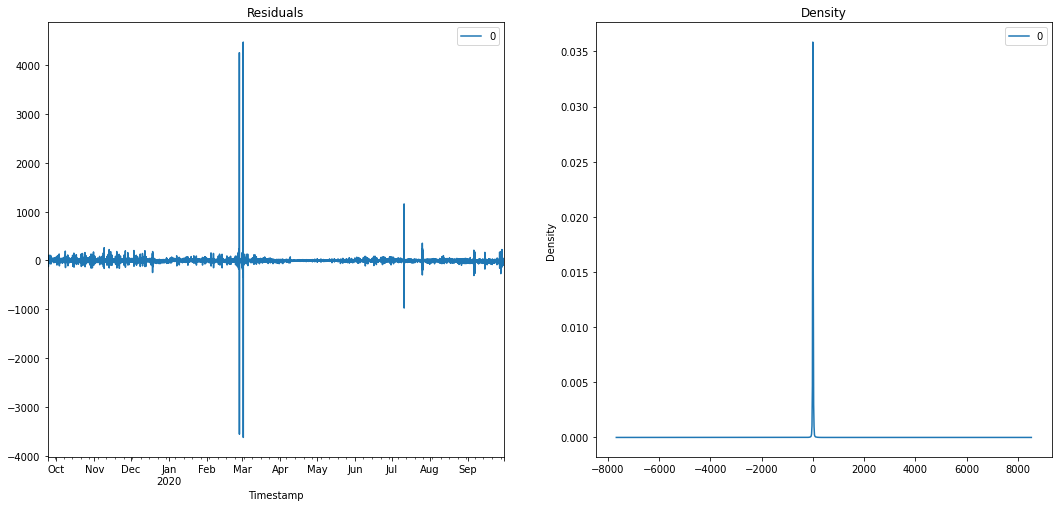

In [95]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

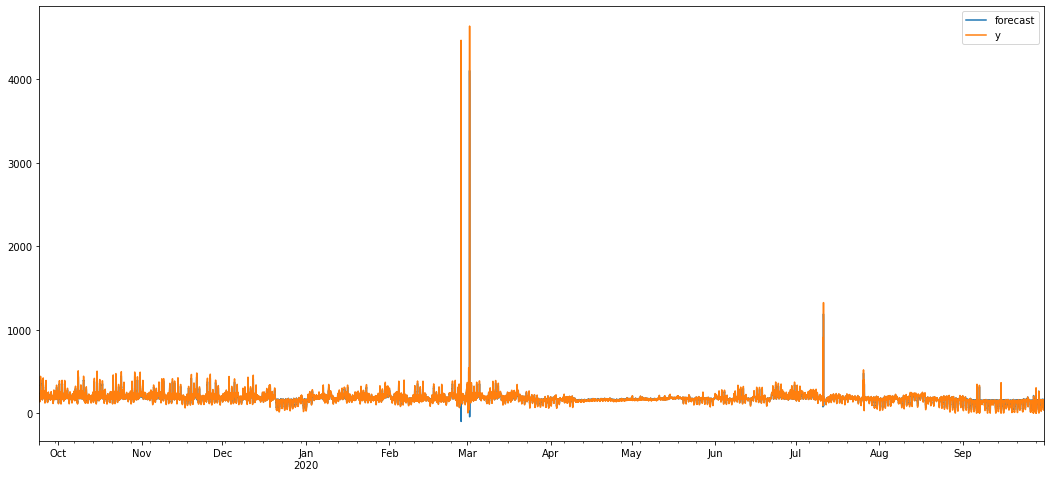

In [96]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()


In [98]:
df_Building0_condensed['y']

Timestamp
2019-09-24 00:15:00    193.0
2019-09-24 00:30:00    193.0
2019-09-24 00:45:00    193.0
2019-09-24 01:00:00    193.0
2019-09-24 01:15:00    173.9
                       ...  
2020-09-30 22:45:00     96.9
2020-09-30 23:00:00     96.9
2020-09-30 23:15:00     37.4
2020-09-30 23:30:00     37.4
2020-09-30 23:45:00     37.4
Name: y, Length: 35807, dtype: float64

In [99]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_Building0_condensed ['y'][:28645]
test = df_Building0_condensed ['y'][28645:]

In [100]:
# Build Model
model = ARIMA(train, order=(1, 0, 1))  
fitted = model.fit(disp=-1)  


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency 15T will be used.



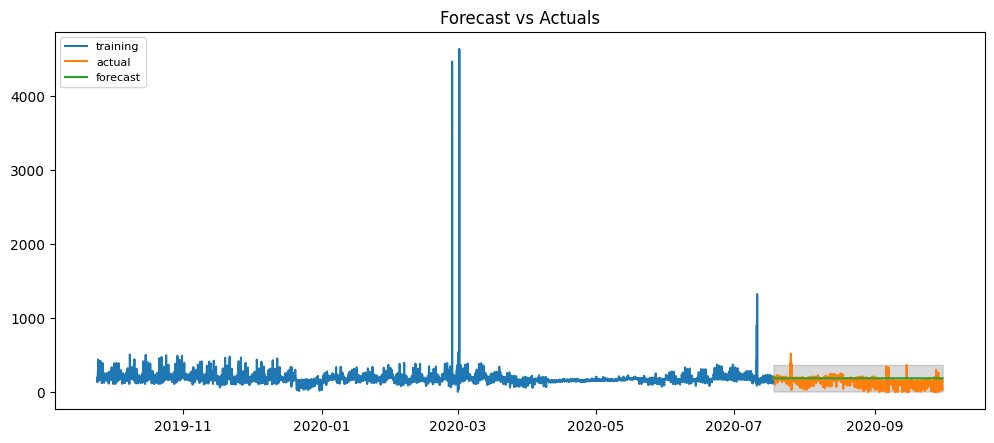

In [101]:

# Forecast
fc, se, conf = fitted.forecast(7162, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [102]:
forecast = fc_series
actual = test



def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)




/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



{'acf1': 0.9357763933101626,
 'corr': 0.03498026944790533,
 'mae': 47.41330459860417,
 'mape': 4.758194539853224,
 'me': 40.128012459279994,
 'minmax': 0.2497576146634396,
 'mpe': 4.726204367102383,
 'rmse': 64.81844646017706}